In [0]:
import pandas as pd

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)

Using TensorFlow backend.


In [4]:
# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

100.0% 60276736 / 60270631


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted
Starting to parse images...
Parsing Done!


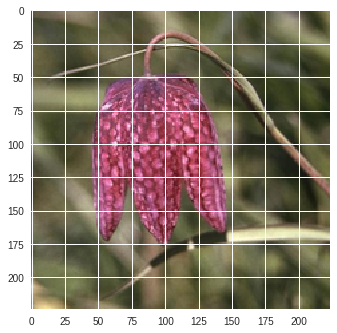

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x[0])
plt.show()

In [0]:
# (3) Create a sequential model
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
__________

In [0]:
# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(x, y, batch_size=64, epochs=1000, verbose=1,validation_split=0.3, shuffle=True)

Train on 951 samples, validate on 409 samples
Epoch 1/1000
951/951 [==============================] - 11s 11ms/step - loss: 2.9683 - acc: 0.2271 - val_loss: 12.6529 - val_acc: 0.1418
Epoch 2/1000
951/951 [==============================] - 3s 3ms/step - loss: 2.3052 - acc: 0.3344 - val_loss: 9.6776 - val_acc: 0.2274
Epoch 3/1000
951/951 [==============================] - 3s 3ms/step - loss: 1.8665 - acc: 0.4280 - val_loss: 6.1330 - val_acc: 0.2958
Epoch 4/1000
951/951 [==============================] - 3s 3ms/step - loss: 1.5912 - acc: 0.4795 - val_loss: 9.7808 - val_acc: 0.1956
Epoch 5/1000
951/951 [==============================] - 3s 3ms/step - loss: 1.4312 - acc: 0.5216 - val_loss: 3.7255 - val_acc: 0.3888
Epoch 6/1000
951/951 [==============================] - 3s 3ms/step - loss: 1.2593 - acc: 0.5920 - val_loss: 4.2359 - val_acc: 0.3839
Epoch 7/1000
951/951 [==============================] - 3s 3ms/step - loss: 1.0149 - acc: 0.6509 - val_loss: 3.6032 - val_acc: 0.3741
Epoch 8/1000


KeyboardInterrupt: ignored